# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sinasc = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [96]:
sinasc.loc[sinasc['APGAR5']<=3 , 'Grau_Asfixia' ] = 'Axfixia_grave'
sinasc.loc[(sinasc['APGAR5']>=4) & (sinasc['APGAR5']<=5) , 'Grau_Asfixia' ] = 'Axfixia_Moderada'
sinasc.loc[(sinasc['APGAR5']>=6) & (sinasc['APGAR5']<=7), 'Grau_Asfixia' ] = 'Axfixia_Leve'
sinasc.loc[sinasc['APGAR5']>=8, 'Grau_Asfixia' ] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='Grau_Asfixia,SEXO'>

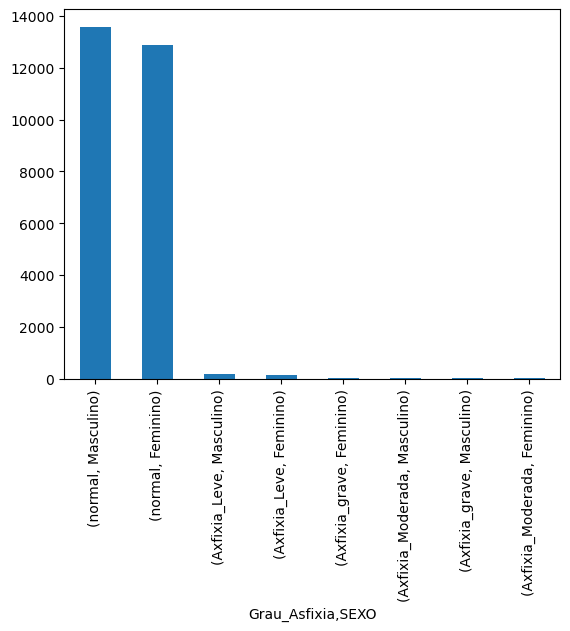

In [114]:
sinasc[['Grau_Asfixia','SEXO']].value_counts().plot.bar()

In [ ]:
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='Axfixia_grave', data=sinasc['Grau_Asfixia'])
sns.countplot(ax = axes[0, 1], x='Axfixia_moderada', data=sinasc['Grau_Asfixia'])
sns.countplot(ax = axes[1, 0], x='Axfixia_leve', data=sinasc['Grau_Asfixia'])
sns.countplot(ax = axes[1, 1], x='normal', data=sinasc['Grau_Asfixia'])

<Axes: ylabel='count'>

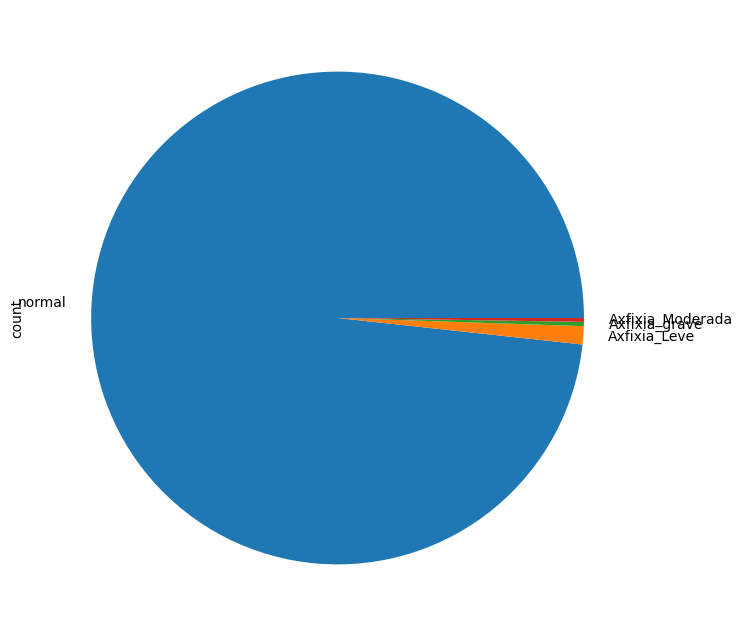

In [129]:
sinasc['Grau_Asfixia'].value_counts().plot.pie()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

<Axes: xlabel='GESTACAO'>

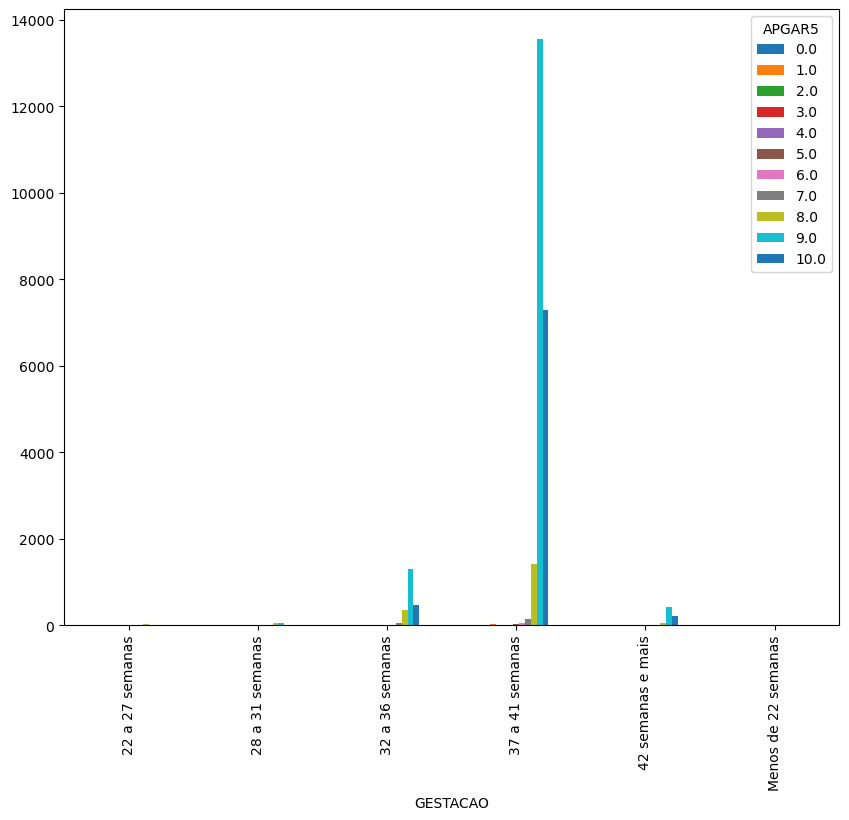

In [163]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq.plot.bar()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [167]:
freq.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [170]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [173]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

<Axes: xlabel='GESTACAO'>

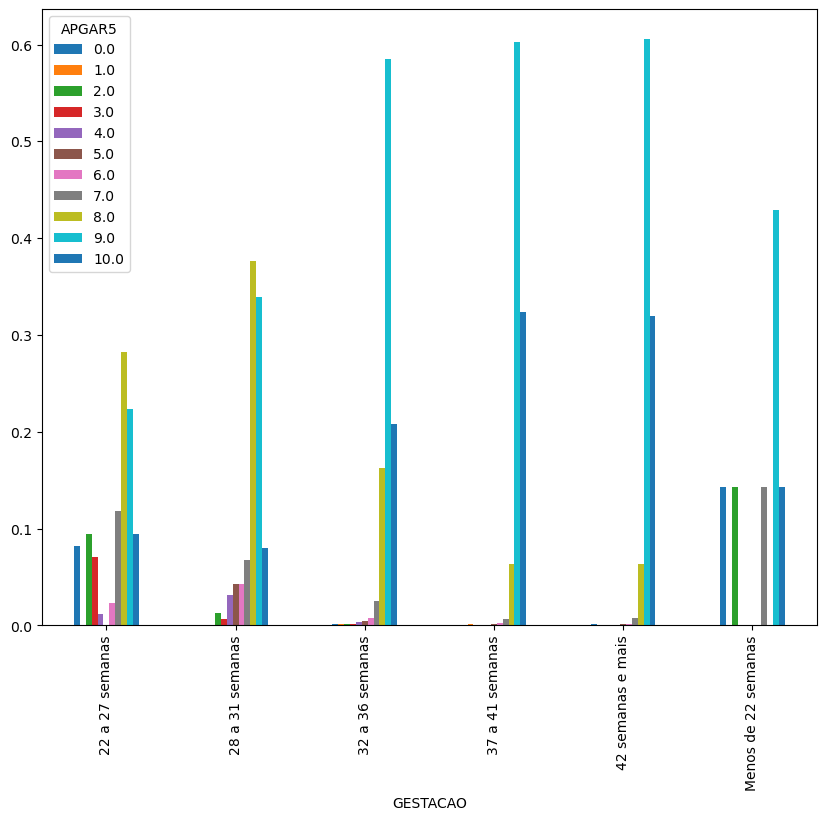

In [176]:
freq_pctlin.plot.bar()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.